In [1]:
from pathlib import Path
from ultralytics import YOLO
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [15]:
#model = YOLO("runs/detect/train/weights/best.pt")

#model = YOLO("brenda_best.pt")
model = YOLO("runs/detect/train16/weights/best.pt")



In [16]:
test_list_path = "datasets/SKU-110K/test.txt"
dataset_root = Path("datasets/SKU-110K")
image_paths = [dataset_root / line.strip() for line in open(test_list_path)]
label_paths = [dataset_root / line.strip().replace('images', 'labels') for line in open(test_list_path)]

In [17]:
image_paths[0]

PosixPath('datasets/SKU-110K/images/test_0.jpg')

In [18]:
label_paths[0]

PosixPath('datasets/SKU-110K/labels/test_0.jpg')

In [19]:
results = model(source=image_paths[0], save=True, save_dir='runs/detect/test')

image 1/1 /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_0.jpg: 640x480 142 objects, 11 emptys, 14.7ms
Speed: 1.4ms preprocess, 14.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /home/wildsense/Documents/projects/retail-object-detection/runs/detect/predict8


In [20]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'object', 1: 'empty'}
obb: None
orig_img: array([[[134, 113, 158],
        [148, 131, 164],
        [189, 175, 187],
        ...,
        [109, 109, 169],
        [113, 108, 169],
        [112, 107, 168]],

       [[130, 109, 154],
        [148, 131, 164],
        [189, 177, 189],
        ...,
        [112, 113, 171],
        [113, 111, 170],
        [113, 111, 170]],

       [[128, 107, 152],
        [149, 132, 165],
        [192, 180, 192],
        ...,
        [116, 118, 172],
        [117, 118, 174],
        [118, 119, 175]],

       ...,

       [[ 72,  83, 113],
        [ 73,  84, 114],
        [ 75,  84, 117],
        ...,
        [ 27,  29,  39],
        [ 26,  28,  38],
        [ 21,  23,  33]],

       [[ 69,  80, 110],
        [ 71,  82, 112],
        [ 73,  84, 114],
        ...,
        [ 28,  30,  40],
        [ 27,  29,  39],
 


image 1/1 /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_0.jpg: 640x480 142 objects, 11 emptys, 3.3ms
Speed: 1.4ms preprocess, 3.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


Text(0.5, 1.0, 'Prediction')

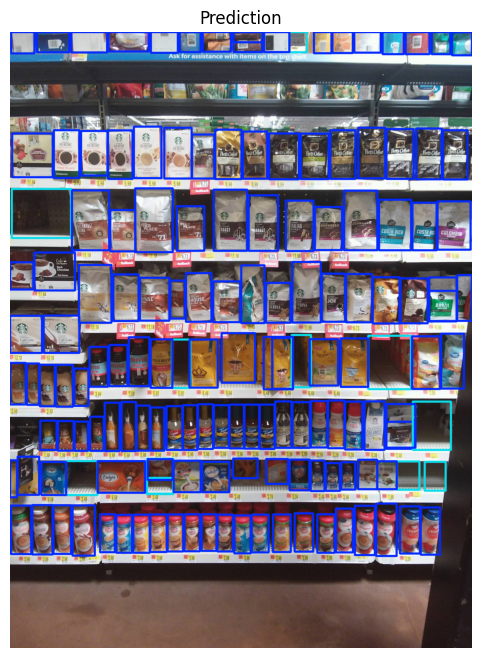

In [21]:
results = model.predict(source=str(image_paths[0]), save=False)

rendered = results[0].plot(labels=False)
img = Image.fromarray(rendered[..., ::-1])

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Prediction')

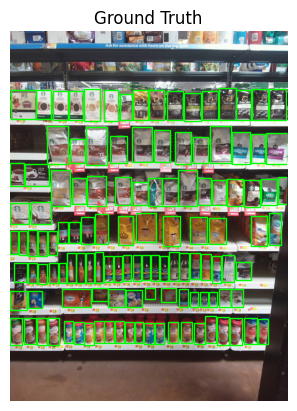

In [9]:

img = Image.open(image_paths[0])
w, h = img.size

label_path = Path("datasets/SKU-110K/labels") / image_paths[0].name.replace(".jpg", ".txt")
with open(label_path, "r") as f:
    labels = [list(map(float, line.strip().split())) for line in f]

fig, ax = plt.subplots()
ax.imshow(img)

for cls, xc, yc, bw, bh in labels:
    x = (xc - bw / 2) * w
    y = (yc - bh / 2) * h
    bw_pix = bw * w
    bh_pix = bh * h
    rect = patches.Rectangle((x, y), bw_pix, bh_pix, linewidth=1, edgecolor='lime', facecolor='none')
    ax.add_patch(rect)

plt.axis('off')
plt.title('Ground Truth')
plt.show()

In [10]:
model = YOLO("runs/detect/train/weights/best.pt")
metrics = model.val(data="SKU-110K.yaml")


Ultralytics 8.3.168 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11871MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

WARNING ⚠️ Dataset 'SKU-110K.yaml' images not found, missing path '/home/wildsense/Documents/projects/datasets/datasets/SKU-1K/val.txt'


  1%|          | 120M/11.4G [00:22<35:43, 5.63MB/s]   


KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Evaluate on the test set
metrics = model.val(data="SKU-110K.yaml", split="test")

Ultralytics 8.3.168 🚀 Python-3.10.12 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070, 11865MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 728.3±564.3 MB/s, size: 984.0 KB)


val: Scanning /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/labels... 2935 images, 0 backgrounds, 1 corrupt: 100%|██████████| 2936/2936 [00:02<00:00, 1034.53it/s]

val: /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_1029.jpg: corrupt JPEG restored and saved
val: /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_1035.jpg: corrupt JPEG restored and saved
val: /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_1059.jpg: corrupt JPEG restored and saved
val: /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_1086.jpg: corrupt JPEG restored and saved
val: /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_1090.jpg: corrupt JPEG restored and saved
val: /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_1102.jpg: corrupt JPEG restored and saved
val: /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_112.jpg: corrupt JPEG restored and saved
val: /home/wildsense/Documents/projects/retail-ob

val: New cache created: /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  14%|█▎        | 25/184 [00:08<00:16,  9.88it/s]Corrupt JPEG data: premature end of data segment
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  17%|█▋        | 31/184 [00:08<00:14, 10.72it/s]Corrupt JPEG data: premature end of data segment
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  18%|█▊        | 33/184 [00:09<00:13, 11.07it/s]Corrupt JPEG data: 358 extraneous bytes before marker 0xd9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  19%|█▉        | 35/184 [00:09<00:13, 11.37it/s]Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  21%|██        | 39/184 [00:09<00:12, 11.48it/s]Corrupt JPEG data: premature end of data segment
                 Class     Images  Instances  

                   all       2935     431419      0.902      0.844      0.915      0.585
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /home/wildsense/Documents/projects/retail-object-detection/runs/detect/val3


In [ ]:
model = YOLO("yolo11n.pt")

In [ ]:
results = model.predict(source=str(image_paths[0]), save=False)



image 1/1 /home/wildsense/Documents/projects/retail-object-detection/datasets/SKU-110K/images/test_0.jpg: 640x480 (no detections), 28.7ms
Speed: 3.0ms preprocess, 28.7ms inference, 26.9ms postprocess per image at shape (1, 3, 640, 480)


Text(0.5, 1.0, 'Prediction')

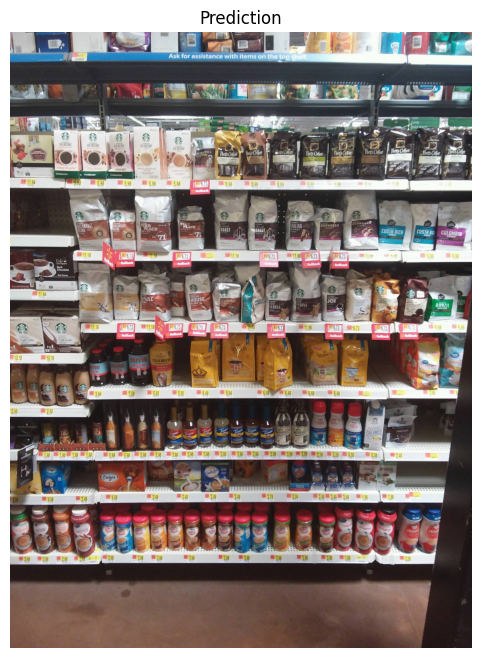

In [ ]:
rendered = results[0].plot(labels=False)
img = Image.fromarray(rendered[..., ::-1])

plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title('Prediction')

In [14]:
import os
folder = "pre-labels"
files = os.listdir(folder)

for i in files:  
    filename = os.path.join(folder, i)

    with open(filename, "r") as file:
        lines = file.readlines()
    
    new_lines = []
    for line in lines:
        parts = line.strip().split()
        if parts:
            parts[0] = '1' if parts[0] == '0' else '0'
            new_line = ' '.join(parts)
            new_lines.append(new_line + '\n')
    
    with open(filename, "w") as file:
        file.writelines(new_lines)